In [7]:
import pandas as pd
import numpy as np

winrates = pd.read_csv('web/champion_winrates.csv')
all_winrates = winrates.groupby('Champion Name')['Win Rate'].apply(list)
all_winrates = all_winrates.reset_index()
all_winrates['Win Rate'] = all_winrates['Win Rate'].apply(lambda x: [int(i[:-1]) for i in x])
all_winrates['Mean'] = all_winrates['Win Rate'].apply(lambda x: sum(x) / len(x))
all_winrates['Maximum'] = all_winrates['Win Rate'].apply(lambda x: max(x))
all_winrates['Minimum'] = all_winrates['Win Rate'].apply(lambda x: min(x))
all_winrates['q3'] = all_winrates['Win Rate'].apply(lambda x: np.percentile(x, 75))
all_winrates['q1'] = all_winrates['Win Rate'].apply(lambda x: np.percentile(x, 25))
all_winrates['iqr'] = all_winrates['q3'] - all_winrates['q1']
all_winrates['median'] = all_winrates['Win Rate'].apply(lambda x: np.percentile(x, 50))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a565664fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a565671730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a565664c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a565671e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a56567f220>],
 'means': []}

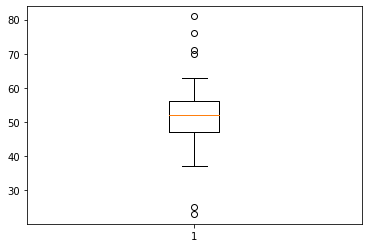

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(all_winrates[all_winrates['Champion Name'] == 'LeBlanc']['Win Rate'])

In [10]:
all_winrates.sort_values('q3', ascending=False)

,Champion Name,Win Rate,Mean,Maximum,Minimum,q3,q1,iqr,median
100,Rumble,"[63, 56, 58, 57, 83, 57, 63, 61, 54, 76, 67, 6...",59.028571,83,37,67.00,52.50,14.50,58.0
94,Rammus,"[58, 56, 61, 66, 62, 54, 60, 75, 63, 65, 71, 7...",62.250000,75,50,67.00,57.50,9.50,61.5
13,Blitzcrank,"[79, 56, 58, 53, 63, 50, 60, 61, 57, 57, 50, 6...",60.092593,88,31,66.25,52.75,13.50,59.5
92,Quinn,"[58, 71, 66, 50, 65, 76, 50, 52, 50]",59.777778,76,50,66.00,50.00,16.00,58.0
26,Elise,"[68, 58, 68, 55, 50, 50, 53, 81, 50, 63, 66, 6...",58.838710,82,44,66.00,51.50,14.50,58.0
...,...,...,...,...,...,...,...,...,...
112,Sivir,"[53, 65, 54, 55, 55, 56, 61, 55, 56, 52, 45, 5...",56.000000,67,45,57.50,53.25,4.25,55.0
113,Skarner,"[52, 54, 46, 60, 58, 48, 52, 45, 55, 45, 61, 4...",52.000000,63,41,57.25,46.50,10.75,52.0
81,Neeko,"[56, 52, 52, 53, 56, 61, 60, 56, 68, 48, 54, 45]",55.083333,68,45,57.00,52.00,5.00,55.0
63,LeBlanc,"[53, 70, 60, 41, 43, 76, 50, 53, 50, 52, 81, 6...",52.086957,81,23,56.00,47.00,9.00,52.0


In [6]:
all_winrates.to_csv('web/winrate_statistics.csv')

,Aatrox
0,52
1,59
2,49
3,56
4,51
...,...
87,71
88,48
89,42
90,59
